In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [105]:
data = pd.read_csv("data.csv")

In [111]:
del data['Unnamed: 32']

In [112]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [114]:
freq = data['diagnosis'].value_counts()
freq

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: title={'center': 'Number of cases: Benign VS Malignant'}>

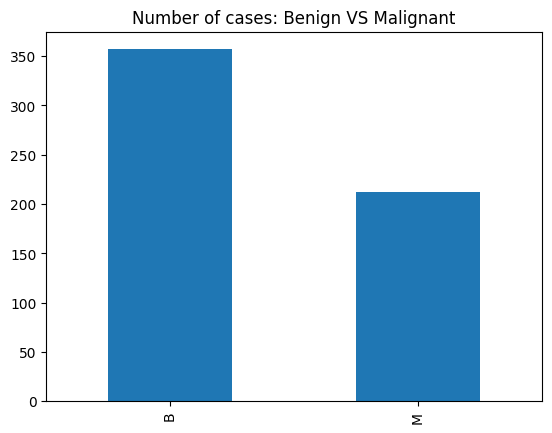

In [120]:
data['diagnosis'].value_counts()[:10].plot(kind='bar', title='Number of cases: Benign VS Malignant')

C:\Users\adity\AppData\Local\Temp\ipykernel_55968\3382473433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean']].corr()


<Axes: >

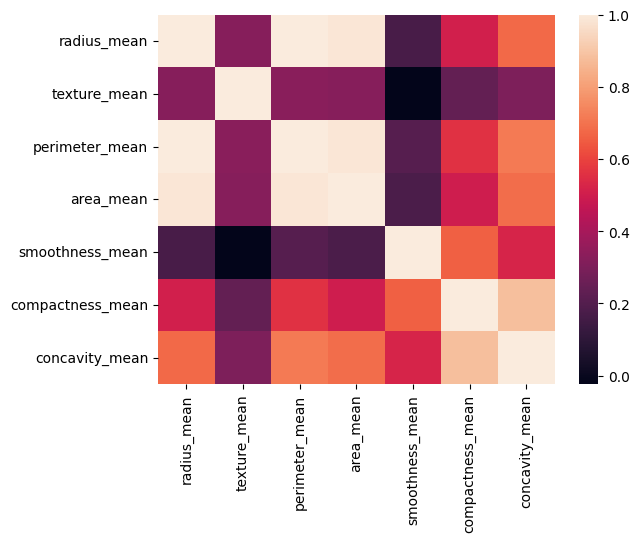

In [125]:
corr = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [136]:
data['diagnosis'] = data.diagnosis.map(dict(M=1, B=0))
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [138]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.loc[:, 'diagnosis'], test_size=0.3,random_state=42) # 70% training and 30% test


In [139]:
#Import svm model
from sklearn import svm

#Create svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [140]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [141]:
# Model Precision: 
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall:
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


## From Scratch

In [ ]:
from sklearn import svm
Y = data.loc[:, 'diagnosis']
X = data.iloc[:, 1:]
clf = svm.SVC()
clf.fit(X, Y)

In [126]:
regularization_strength = 10000

def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [127]:
regularization_strength = 10000

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw


In [128]:
learning_rate = 0.000001

def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score

def preprocess_data():
    print("Importing dataset...")
    data = pd.read_csv('data.csv')
    
    # Drop ID column and the last column (target label)
    data = data.iloc[:, 1:-1]
    
    # Convert target labels (M/B) to numeric values (1/-1)
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': -1})
    
    # Split data into features and target
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale data for better convergence and to prevent overflow
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Add intercept term to feature matrices
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    
    return X_train, X_test, y_train, y_test

def sgd(X, y, eta=0.000001, C=10000, epochs=100):
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i, x in enumerate(X):
            if y[i] * np.dot(w, x) < 1:
                w = w - eta * (w - C * y[i] * x)
            else:
                w = w - eta * w
    return w

def train_and_test(X_train, X_test, y_train, y_test):
    print("Training started...")
    w = sgd(X_train, y_train)
    print("Weights are: {}".format(w))
    
    y_train_pred = np.sign(X_train @ w)
    y_test_pred = np.sign(X_test @ w)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    print("Training accuracy: {:.4f}, recall: {:.4f}, precision: {:.4f}".format(train_accuracy, train_recall, train_precision))
    print("Test accuracy: {:.4f}, recall: {:.4f}, precision: {:.4f}".format(test_accuracy, test_recall, test_precision))

def run():
    X_train, X_test, y_train, y_test = preprocess_data()
    train_and_test(X_train, X_test, y_train, y_test)
    
if __name__ == "__main__":
    run()


reading dataset...
applying feature engineering...
splitting dataset into train and test sets...
training started...
Epoch is: 1 and Cost is: 5333.470268971643
Epoch is: 2 and Cost is: 3442.930605925151
Epoch is: 4 and Cost is: 2400.9901267068117
Epoch is: 8 and Cost is: 1879.956458159654
Epoch is: 16 and Cost is: 1533.0840928456691
Epoch is: 32 and Cost is: 1206.5897276163194
Epoch is: 64 and Cost is: 956.0980783202056
Epoch is: 128 and Cost is: 808.8978070339858
Epoch is: 256 and Cost is: 704.5544412557902
Epoch is: 512 and Cost is: 650.5122493623597
Epoch is: 1024 and Cost is: 622.0936362394641
Epoch is: 2048 and Cost is: 609.8502562432993
Epoch is: 4096 and Cost is: 604.8538673329487
training finished.
weights are: [ 1.28859972  0.9218701   1.10167718  2.16639432 -1.23622874 -3.13643251
  3.31000704  6.71737284 -0.4933663   0.0244442   5.59968002 -1.86567155
  3.27507042  3.69852717  1.63237421 -2.42336637 -1.67635251  0.71855573
 -1.91686181 -1.79066917  2.73228826  5.27411466  1.